In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

import seaborn as sns; sns.set()

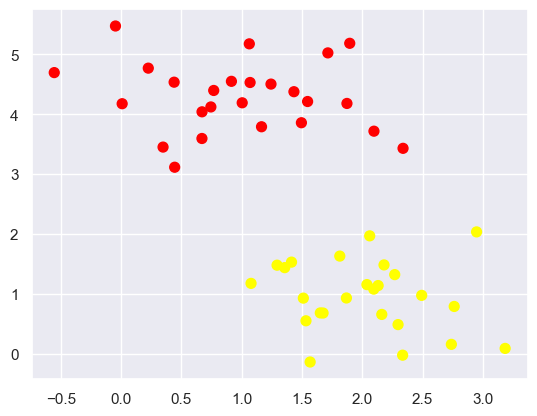

In [12]:
##Creation of Data points 
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.show()


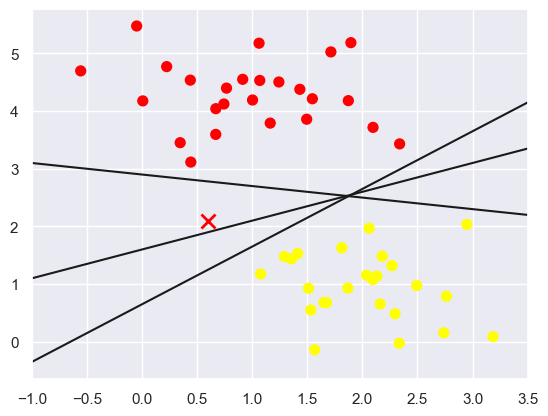

In [32]:
xfit = np.linspace(-1,3.5)
plt.scatter(X[:,0],X[:,1],c=y, s=50, cmap='autumn')
plt.plot([0.6],[2.1], 'x',color='red',markeredgewidth=2, markersize=10) #unknown model

for m,b in [(1,0.65),(0.5,1.6),(-0.2,2.9)]:
    plt.plot(xfit,m*xfit+b,'-k')
    
plt.xlim(-1,3.5);

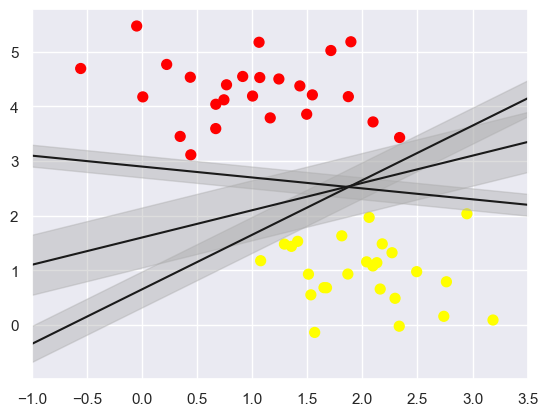

In [35]:
xfit = np.linspace(-1,3.5)
plt.scatter(X[:,0],X[:,1],c=y, s=50, cmap='autumn')

for m,b,d in [(1,0.65,0.33),(0.5,1.6,0.55),(-0.2,2.9,0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit,yfit,'-k')
    plt.fill_between(xfit,yfit - d, yfit + d, edgecolor = 'none', #Margin
                    color = '#AAAAAA', alpha=0.4)
    
    plt.xlim(-1,3.5);

### Support Vector Machine


In [36]:
from sklearn.svm import SVC # support vector classifier -- another one support vector regression
model = SVC(kernel='linear', C=1E10) # C = penalty for margin fit
model.fit(X,y)

SVC(C=10000000000.0, kernel='linear')

In [38]:
model.n_support_  #find the number of support vectors -- point most near the hyperplane(margin) is known as support vector

array([2, 1])

In [40]:
X.shape

(50, 2)

In [42]:
model.coef_

array([[ 0.23525694, -1.41250783]])

In [44]:
model.intercept_

array([3.29634152])

In [47]:
model.dual_coef_ #co-efficient for 3 support vectors - model.n_support

array([[-0.2738502 , -0.75147416,  1.02532437]])

In [49]:
model.support_vectors_

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

In [50]:
model.support_

array([18, 25,  7])

In [56]:
X[18,:],y[18] ##output as class 0 -- one cluster -- below array gives the support vector for class 0

(array([0.44359863, 3.11530945]), 0)

In [57]:
X[7],y[7]  ##class 1

(array([2.06156753, 1.96918596]), 1)

In [59]:
def plot_svc_decision_function(model,ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
        xlim = ax.get_xlim()
        ylim = ax.get_ylim()
        
        #create grid to evaluate the model
        x = np.linspace(xlim[0], xlim[1], 30)
        y = np.linspace(ylim[0], ylim[1], 30)
        Y, X = np.meshgrid(y,x)
        xy = np.vstack([X.ravel(),Y.ravel()]).T
        P = model.decision_function(xy).reshape(X.shape)  ## decison function draw the line
        
        #plot decision boundary and margins
        ax.contour(X, Y, P, colors='k',
                  levels=[-1,0,1],alpha = 0.5,
                  linestyles=['--', '-', '--'])
        
        #plot support vectors
        if plot_support:
            ax.scatter(model.support_vectors_[:,0],
                      model.support_vectors_[:,1],
                      s=300, linewidth=2, facecolors='none',edgecolors='black');
            
        ax.set_xlim(xlim)
        ax.set_ylim(ylim)
        

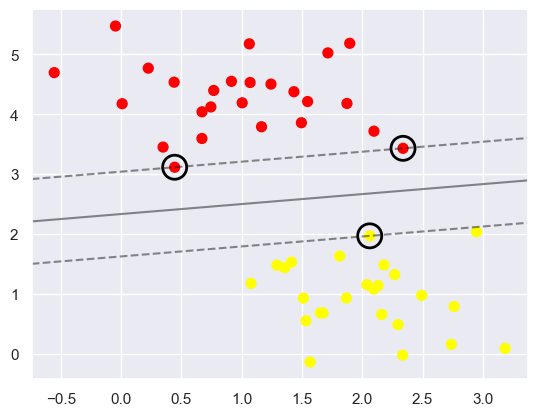

In [60]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap = 'autumn')
plot_svc_decision_function(model);

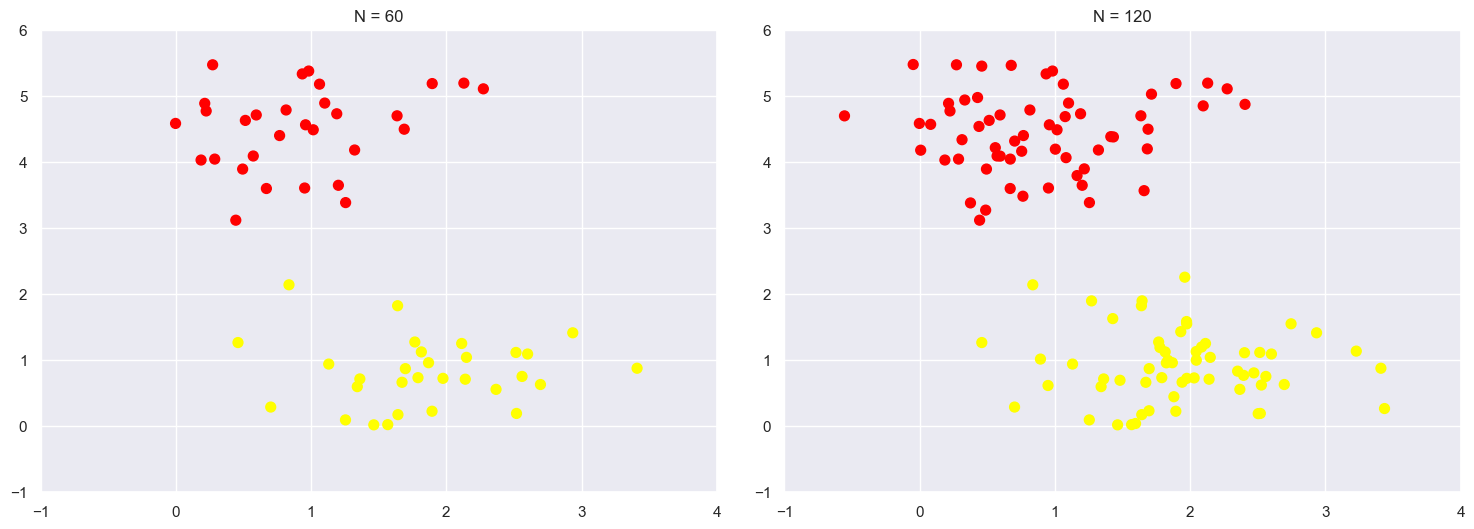

In [61]:
## Changing the number of samples -- Conclusion -- Support vector not easily affected by the change of number of the samples


def plot_svm(N=10, ax=None):
    X, y = make_blobs(n_samples=200, centers=2,
                      random_state=0, cluster_std=0.60)
    X = X[:N]
    y = y[:N]
    model = SVC(kernel='linear', C=1E10)
    model.fit(X, y)
    
    ax = ax or plt.gca()
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 6)
    plot_svc_decision_function(model, ax)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for axi, N in zip(ax, [60, 120]): 
    plot_svm(N, axi)
    axi.set_title('N = {0}'.format(N))

In [63]:
from ipywidgets import interact, fixed
interact(plot_svm, N=[10, 200,1000], ax=fixed(None));

interactive(children=(Dropdown(description='N', options=(10, 200, 1000), value=10), Output()), _dom_classes=('…

### SVM - Non Linear

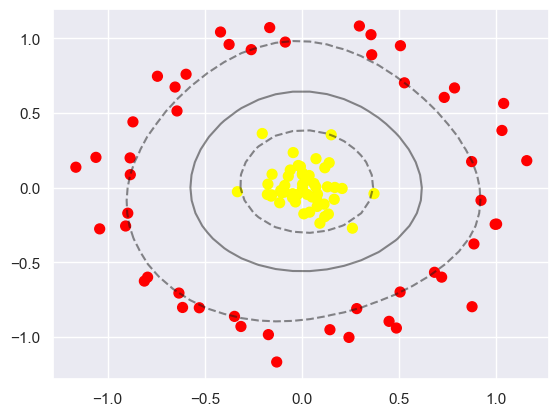

In [74]:
from sklearn.datasets import make_circles
X, y = make_circles(100,random_state = 42, factor=.1, noise=.1)

clf = SVC(kernel='rbf',random_state=42).fit(X, y) #kernel - radial base function

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf, plot_support=False); # use false to non linear

In [76]:
## C value and gamma value for how strict support vector should be.
## Hypertuning helps to find them.
